<a href="https://colab.research.google.com/github/Digitall-Ivan/Data_Analytics_course/blob/main/Ivan_Zakorchevnyi_Additional_hw_6_Pandas_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Усі імпорти рекомендую розташувати отут зверху для зручності.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.Завантажте дані у pandas dataframe з файла `ecommerce_data.csv`. Обовʼязково при завантаженні вкажіть параметр `encoding = 'ISO-8859-1'`, без нього буде помилка.

In [3]:
# Завантажуємо набір даних
df_ecom = pd.read_csv('/content/drive/MyDrive/I LOVE DATA EDU COURSE/RAWDATA/ecommerce_data_1.csv', encoding='ISO-8859-1')

2.Виведіть перші три записи в завантаженому наборі даних

In [4]:
print(df_ecom.head(3))

  InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  


3.Перейменуйте колонки, для цього просто запустіть код нижче та зверніть увагу, як ми перейменували колонки. Перейменування тут - просто для зручності.

In [7]:
# Перейменував колонки для зручності
df_ecom = df_ecom.rename(columns={
    'InvoiceNo': 'invoice_no',
    'StockCode': 'stock_code',
    'Description': 'description',
    'Quantity': 'quantity',
    'InvoiceDate': 'invoice_date',
    'UnitPrice': 'unit_price',
    'CustomerID': 'customer_id',
    'Country': 'country'
})



4.Виведіть поточні назви колонок.

In [6]:
print(df_ecom.head(3))

  invoice_no stock_code                         description  quantity  \
0     536365     85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                 WHITE METAL LANTERN         6   
2     536365     84406B      CREAM CUPID HEARTS COAT HANGER         8   

     invoice_date  unit_price  customer_id         country  
0  12/1/2010 8:26        2.55      17850.0  United Kingdom  
1  12/1/2010 8:26        3.39      17850.0  United Kingdom  
2  12/1/2010 8:26        2.75      17850.0  United Kingdom  


# Базове розуміння даних

5.Виведіть кількість колонок і стовпців в наборі даних.

In [8]:
rows, cols = df_ecom.shape
print(f"Кількість рядків: {rows}")
print(f"Кількість стовпців: {cols}")


Кількість рядків: 541909
Кількість стовпців: 8


6.Виведіть типи даних в кожній з колонок. Будь-яким способом, але аби для Вас як для дослідника стало зрозуміло, з якими даними ми зараз маємо справу.

In [9]:
print(df_ecom.dtypes)

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object


Очікуваний результат (один з):

![](https://drive.google.com/uc?export=view&id=1Pc2cam8vdZeEP4xLXlsoevOTt4O_KI4R)

7.Виведіть кількість пустих (null) значень в кожній з колонок за спаданням цієї кількості.

In [10]:
df_ecom.isnull().sum().sort_values(ascending=False)

,0
customer_id,135080
description,1454
stock_code,0
invoice_no,0
quantity,0
invoice_date,0
unit_price,0
country,0


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1IXVowBSH9-LtCR8gkMXcQHXWPinujkF5)

### Конвертація дат

8.Конвертуйте дату колонки `invoicedate` у тип `datetime64[ns]`.

In [12]:
df_ecom['invoice_date'] = pd.to_datetime(df_ecom['invoice_date'])


Запустіть код нижче:

In [14]:
df_ecom.invoice_date[:2]

,invoice_date
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1ds5CwdM5D50hlnk1zsDw7YT-aG_KErIg)

# Чистка даних

### Прибираємо пусті значення (NA)

9.Приберіть усі пусті значення з набору даних `df` і запишіть результат у нову змінну `df_new`.

In [15]:
df_new_ecom = df_ecom.dropna()


10.Виведіть кількість колонок і рядків в `df_new`.

In [16]:
df_new_ecom.isnull().sum()


,0
invoice_no,0
stock_code,0
description,0
quantity,0
invoice_date,0
unit_price,0
customer_id,0
country,0


11.Виведіть, який відсоток (від 0 до 100%) рядків ми видалили з `df`, коли прибрали пусті значення? Округліть результат до цілих відсотків.

In [17]:
total_rows = len(df_ecom)
clean_rows = len(df_new_ecom)

# Тут рахую відсоток видалених рядків
removed_percent = round((total_rows - clean_rows) / total_rows * 100)

print(f"{removed_percent}%")


25%


Очікуваний результат: `25%`

### Приберемо негативні значення `quantity`

12.Виведіть мінімальне, максимальне і середнє значення колонки `quantity`. Найкраще згадати, як це зробити одною командою, що дозволяє "описати" колонки в датафреймі :)

In [19]:
df_new_ecom['quantity'].agg(['min', 'max', 'mean'])


,quantity
min,-80995.000000
max,80995.000000
mean,12.061303


13.Скажімо, нас не цікавлять записи з негативними quantity (бо це поверненння).   
Приберіть всі рядки, де `quantity` менше 0 з набора даних `df_new` і запишіть в той самий набір даних `df_new`.

In [21]:
df_new_ecom = df_new_ecom[df_new_ecom['quantity'] >= 0]


# Обробка даних

### Зміна типу даних `custid`

14.Ідентифікатор клієнта має мати тип "рядок" для простоти роботи з цією колонкою. Бо інакше пандас буде інтерпретувати цю колонку як число - а це логічно не правильно.
Перетворіть тип даних колонки `custid`  спочатку на int, а потім на рядок. Або можете зробити ці перетворення в одній функції (лямбді).

In [26]:
df_new_ecom.loc[:, 'customer_id'] = df_new_ecom['customer_id'].astype(int).astype(str)



Запустіть код нижче:

In [27]:
df_new_ecom['customer_id'][:3]

,customer_id
0,17850
1,17850
2,17850


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1V5Mn0OC6hD-OmXGswe2N8CsIxsuBuoPE)

### Додамо колонку `amountspent`

15.Додайте в `df_new` колонку `amountspent`, яка є добутком колонок `quantity` і `unitprice`.

In [30]:
df_new_ecom.loc[:, 'amountspent'] = df_new_ecom['quantity'] * df_new_ecom['unit_price']


### Додавання колонок `month`, `day`, `hour`, `yearmonth` для інвойса.

16.Використовуючи колонку invoicedate та те, що вона в нас вже має тип datetime, створіть 4 нових колонки в даних:
- `yearmonth` - рік і місяць інвойсу разом у форматі "2010-12" - тобто 12 місяць 2010го року і тип цієї колонки має бути датою (підказка: просто робимо для колонки`invoicedate` `dt.to_period('M')` для того аби таке отримати)
- `month` - місяць інвойсу
- `day` - день тижня інвойсу (понеділок - це перший, неділя - останній)
- `hour` - година інвойсу

Зробіть також так, аби `yearmonth` була третьою (за рахунком) колонкою в датафреймі, `month` - четвертою, `day` - пʼятою, `hour` - шостою.

In [32]:
# Створюю нові колонки
df_new_ecom.loc[:, 'yearmonth'] = df_new_ecom['invoice_date'].dt.to_period('M')
df_new_ecom.loc[:, 'month'] = df_new_ecom['invoice_date'].dt.month
df_new_ecom.loc[:, 'day'] = df_new_ecom['invoice_date'].dt.dayofweek + 1
df_new_ecom.loc[:, 'hour'] = df_new_ecom['invoice_date'].dt.hour

# Переставляю колонки, щоб нові були на позиціях 3-6
cols = list(df_new_ecom.columns)
new_order = cols[:2] + ['yearmonth', 'month', 'day', 'hour'] + [c for c in cols[2:] if c not in ['yearmonth', 'month', 'day', 'hour']]
df_new_ecom = df_new_ecom[new_order]



Запустіть код нижче:

In [33]:
df_new_ecom.head(3)

,invoice_no,stock_code,yearmonth,month,day,hour,description,quantity,invoice_date,unit_price,customer_id,country,amountspent
0,536365,85123A,2010-12,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010-12,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010-12,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [34]:
df_new_ecom.dtypes

,0
invoice_no,object
stock_code,object
yearmonth,period[M]
month,int32
day,int32
hour,int32
description,object
quantity,int64
invoice_date,datetime64[ns]
unit_price,float64


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1Wn4tNmFOvqHk0VLpfwASKWiPpjJ5_Jgt)

![](https://drive.google.com/uc?export=view&id=1fYm7_uYhk14J51YkqJLtsQo_aqxz6jGZ)

# Базовий Exploratory Data Analysis (EDA)

17.Побудуйте з допомогою методів візуалізації `pandas` датафрейму (ті що з категорії `df.plot()`) стовпчастий графік кількості унікальних продажів помісячно за весь наявний період в даних. Зробіть так, аби підписи дат були нахилені під кутом 45 градусів для зручнішого перегляду.
Кількість унікальних продажів - це кількість унікальних інвойсів.

Підказка: для візуалізації нам спочатку треба агреугувати дані помісячно.

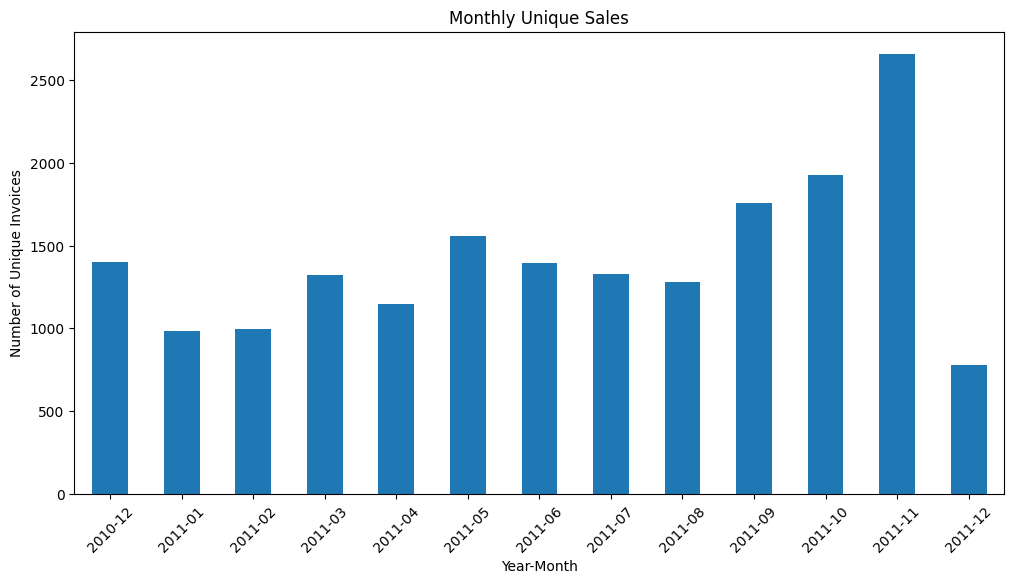

In [35]:
# Агрегую дані помісячно: по колонці yearmonth рахую кількість унікальних InvoiceNo
monthly_unique_invoices = df_new_ecom.groupby('yearmonth')['invoice_no'].nunique()

# Побудував стовпчастого графіка
ax = monthly_unique_invoices.plot(kind='bar', figsize=(12,6))

# Додав підписи осі X під кутом 45 градусів
ax.set_xticklabels(monthly_unique_invoices.index.astype(str), rotation=45)

# Підписи осей та заголовок
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of Unique Invoices')
ax.set_title('Monthly Unique Sales')

plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1xbjqTCroVKLgdRxFGA9LG1T6Xx9eWlO1)

18.Побудуйте стовпчастий графік кількості унікальних інвойсів для топ 10 клієнтів за цим показником.

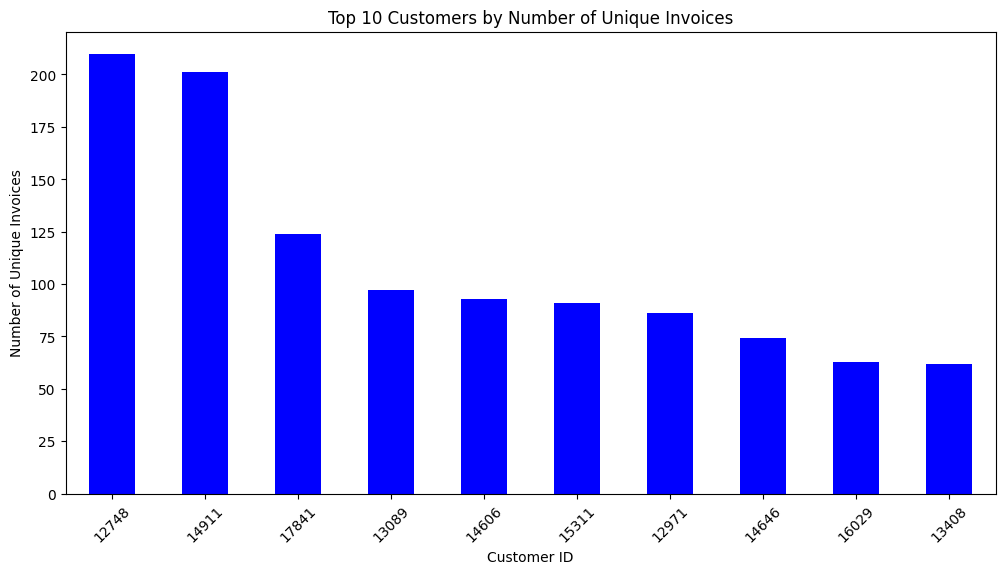

In [37]:
# Рахую кількість унікальних інвойсів для кожного клієнта
top_customers = df_new_ecom.groupby('customer_id')['invoice_no'].nunique().sort_values(ascending=False).head(10)

# Будую стовпчастий графік
ax = top_customers.plot(kind='bar', figsize=(12,6), color='blue')

# Підписи осі X під кутом 45 градусів
ax.set_xticklabels(top_customers.index, rotation=45)

# Підписи осей та заголовок
ax.set_xlabel('Customer ID')
ax.set_ylabel('Number of Unique Invoices')
ax.set_title('Top 10 Customers by Number of Unique Invoices')

plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1zGhcVaPZBqcKj8YG_P-0pOzGVAV8cJNr)

19.Створіть новий датафрейм, що містить сумарний `amountspent` по кожному ідентифікатору клієнта.

In [38]:
# Групую по клієнту і сумую amountspent
df_customer_amount = df_new_ecom.groupby('customer_id', as_index=False)['amountspent'].sum()

df_customer_amount.head()


,customer_id,amountspent
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


20.Використовуючи датафрейм з попереднього пункту, виведіть, якими є 10, 25, 50, 75 і 90 персентилі сумарних витрат клієнтів за розглянутий період:

In [39]:
percentiles = [0.10, 0.25, 0.50, 0.75, 0.90]

df_customer_amount['amountspent'].quantile(percentiles)

,amountspent
0.10,156.566
0.25,307.245
0.50,674.450
0.75,1661.640
0.90,3646.164


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16h2lsEwR3GooNkzH0JLfJHRk5oyG3ZqE)

21.Скільки унікальних клієнтів мають сумарні витрати вищі, ніж 90-тий персентиль в попередньому завдані?

In [42]:
# Обчислюю повторно 90-й персентиль
p90 = df_customer_amount['amountspent'].quantile(0.90)

# Рахую кількість клієнтів з витратами вище 90-го персентиля
num_top_customers = (df_customer_amount['amountspent'] > p90).sum()

print(num_top_customers)


434


In [41]:
# Фільтрую клієнтів, витрати яких вище 90-го персентиля
top_customers = df_customer_amount[df_customer_amount['amountspent'] > p90]

# Сортую за сумою витрат за спаданням
top_customers_sorted = top_customers.sort_values(by='amountspent', ascending=False)

top_customers_sorted

,customer_id,amountspent
1690,14646,280206.02
4202,18102,259657.30
3729,17450,194550.79
3009,16446,168472.50
1880,14911,143825.06
...,...,...
2378,15581,3679.97
2166,15296,3672.86
4185,18079,3651.97
599,13137,3650.41


22.Виведіть середню суму покупок в мережі по дням тижня. Дні тижня мають йти в звичному порядку Monday, Tuesday і т.д.

In [45]:
# Створюю для почтаку колонку з текстовими назвами днів тижня
df_new_ecom['day_name'] = df_new_ecom['invoice_date'].dt.day_name()

# Групую по текстовим назвам днів тижня
avg_amount_per_day = df_new_ecom.groupby('day_name')['amountspent'].mean()

# Встановлюю необхідний порядок днів тижня
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_amount_per_day = avg_amount_per_day.reindex(days_order)

avg_amount_per_day



,amountspent
day_name,
Monday,21.065755
Tuesday,25.582686
Wednesday,23.056790
Thursday,24.694687
Friday,27.098468
Saturday,NaN
Sunday,12.624679


<Axes: title={'center': 'Середня сума покупок по дням тижня'}, xlabel='day_name'>

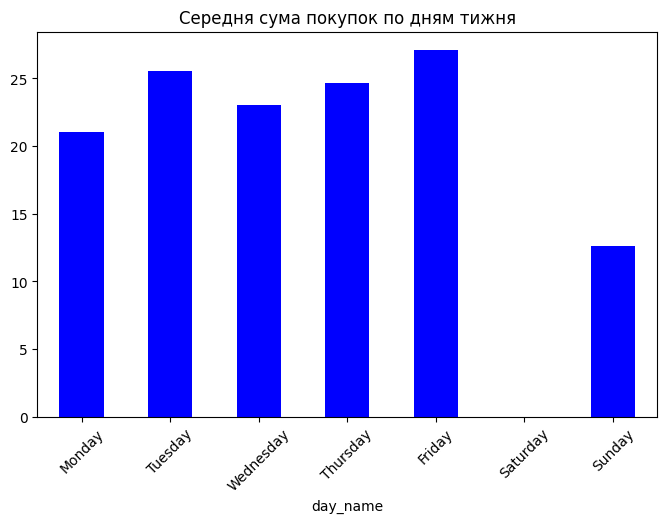

In [47]:
avg_amount_per_day.plot(kind='bar', figsize=(8,5), color='blue', rot=45, title='Середня сума покупок по дням тижня')


## Дослідимо продажі на суму 0 умовних одиниць

23.Можна було помітити вище, що в нас є продажі на суму 0. Дослідимо їх. Створіть новий датафрейм з тільки такими продажами.

In [48]:
df_zero_sales = df_new_ecom[df_new_ecom['amountspent'] == 0]


In [49]:
df_zero_sales.head()
df_zero_sales.shape


(40, 14)

### Динаміка продажів на суму 0

24.Зобразіть у вигляді стовпчастої діаграми помісячну динаміку продажів на суму 0.

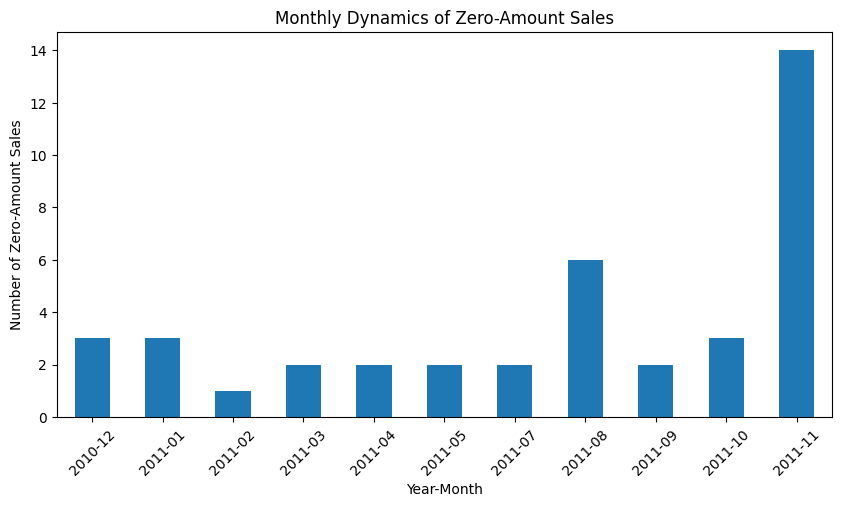

In [50]:
# Групую по місяцю
zero_sales_per_month = df_zero_sales.groupby('yearmonth')['amountspent'].count()

# Будую стовпчасту діаграму
zero_sales_per_month.plot(kind='bar', figsize=(10,5))
plt.xlabel('Year-Month')
plt.ylabel('Number of Zero-Amount Sales')
plt.title('Monthly Dynamics of Zero-Amount Sales')
plt.xticks(rotation=45)
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RfpdWGqkOmwZ6RVUqQz-U-q3qkml5g88)

25.Згрупуйте дані за країнами та підрахуйте кількість унікальних інвойсів з сумою 0 для кожної країни. Виведіть у вигляді датафрейму.

In [51]:
# Групую дані по країнах та рахую унікальні інвойси з amountspent == 0
zero_sales_by_country = df_zero_sales.groupby('country')['invoice_no'].nunique().reset_index()

# Перейменовую колонку для зручності
zero_sales_by_country.rename(columns={'invoice_no': 'zero_amount_invoices'}, inplace=True)

zero_sales_by_country.sort_values(by='zero_amount_invoices', ascending=False)


,country,zero_amount_invoices
9,United Kingdom,21
0,Australia,3
1,EIRE,2
3,Germany,2
4,Netherlands,1
2,France,1
5,Norway,1
6,RSA,1
7,Spain,1
8,Switzerland,1


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1N9rcWby_Umc31Q7e-1p2bCb1nCpzadoz)

Велике питання, чого магазин так багато порівняно роздавав безкоштовних товарів в UK, але така політика фірми :)

Для подальшого аналізу можна звернути особливу увагу на UK, оскільки саме там найбільше “нульових” продажів, тоді як в інших країнах ці випадки практично не вплинуть на загальну картину.

Якщо у вас ще є натхнення, пропоную задати до цих даних ще 3 своїх питання.

1. Які товари найчастіше продаються з нульовою сумою?

Можна подивитись, чи це пов’язані з акційними позиціями, помилками або поверненнями.

Аналіз допоможе бізнесу зрозуміти, які продукти вимагають додаткової уваги.

In [53]:
# Фільтрую продажі з сумою 0
zero_sales = df_new_ecom[df_new_ecom['amountspent'] == 0]

# Рахую кількість таких продажів по Description
top_zero_products = zero_sales['description'].value_counts().head(10)
top_zero_products


,count
description,
Manual,6
ADVENT CALENDAR GINGHAM SACK,1
ROUND CAKE TIN VINTAGE GREEN,1
REGENCY CAKESTAND 3 TIER,1
PAPER BUNTING RETROSPOT,1
ORGANISER WOOD ANTIQUE WHITE,1
PLASTERS IN TIN SKULLS,1
CERAMIC BOWL WITH LOVE HEART DESIGN,1
MINI CAKE STAND HANGING STRAWBERY,1


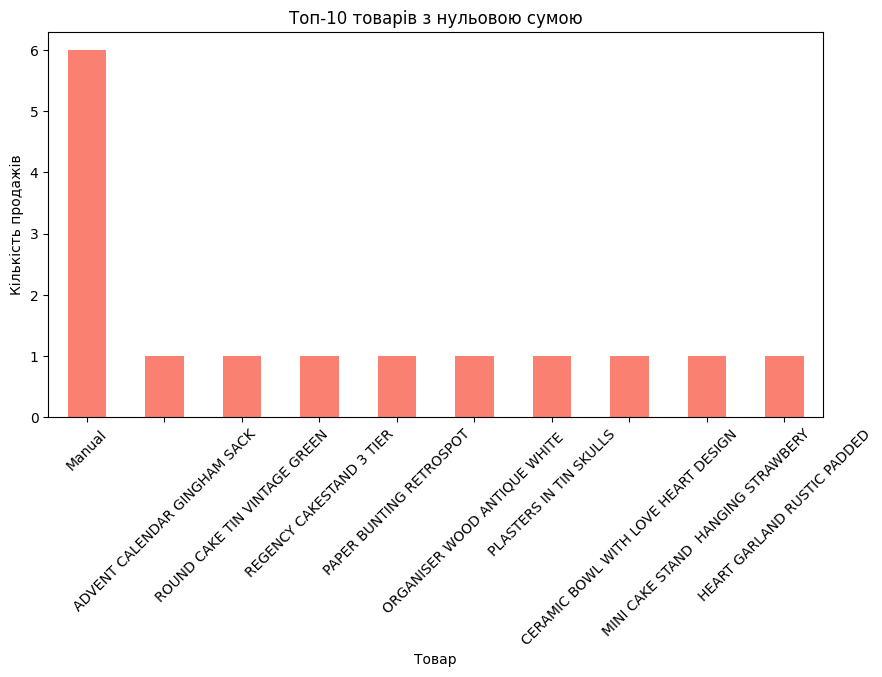

In [56]:
import matplotlib.pyplot as plt

# Стовпчаста діаграма
top_zero_products.plot(kind='bar', figsize=(10,5), color='salmon')
plt.title('Топ-10 товарів з нульовою сумою')
plt.ylabel('Кількість продажів')
plt.xlabel('Товар')
plt.xticks(rotation=45)
plt.show()


2. Які країни мають найбільший середній чек по покупках з реальною сумою (Unit_Price × Quantity > 0)?

Це покаже, де клієнти витрачають більше, і може допомогти у таргетуванні реклами або логістиці.

In [54]:
# Фільтрую продажі з реальною сумою
real_sales = df_new_ecom[df_new_ecom['amountspent'] > 0]

# Рахую середній чек по країнах
avg_amount_per_country = real_sales.groupby('country')['amountspent'].mean().sort_values(ascending=False)
avg_amount_per_country


,amountspent
country,
Netherlands,121.003111
Australia,117.192310
Japan,116.561900
Singapore,95.852658
Sweden,85.096075
Denmark,49.882474
Lithuania,47.458857
Lebanon,37.641778
EIRE,36.697886


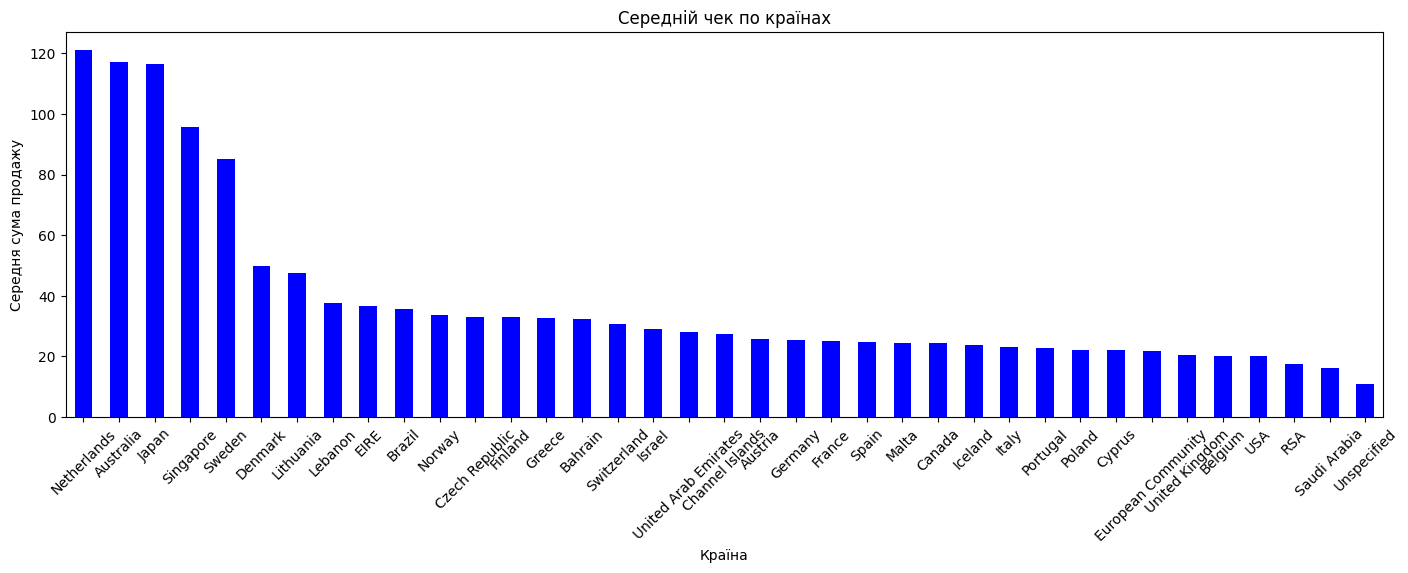

In [59]:
avg_amount_per_country.plot(kind='bar', figsize=(17,5), color='blue')
plt.title('Середній чек по країнах')
plt.ylabel('Середня сума продажу')
plt.xlabel('Країна')
plt.xticks(rotation=45)
plt.show()


3. Які дні тижня і години дня приносять найбільше продажів по сумі?

Дозволяє оптимізувати робочі години, планувати акції або стимулювати персонал у пікові моменти.

In [62]:
# Дні тижня
df_new_ecom['day'] = df_new_ecom['invoice_date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_per_day = df_new_ecom.groupby('day')['amountspent'].mean().reindex(days_order)
print(mean_per_day)


# Години дня
avg_amount_by_hour = real_sales.groupby('hour')['amountspent'].sum()
avg_amount_by_hour


day
Monday       21.065755
Tuesday      25.582686
Wednesday    23.056790
Thursday     24.694687
Friday       27.098468
Saturday           NaN
Sunday       12.624679
Name: amountspent, dtype: float64


,amountspent
hour,
6,4.250
7,31059.210
8,282115.630
9,842605.171
10,1261192.571
11,1104558.750
12,1378571.480
13,1173264.750
14,995629.371


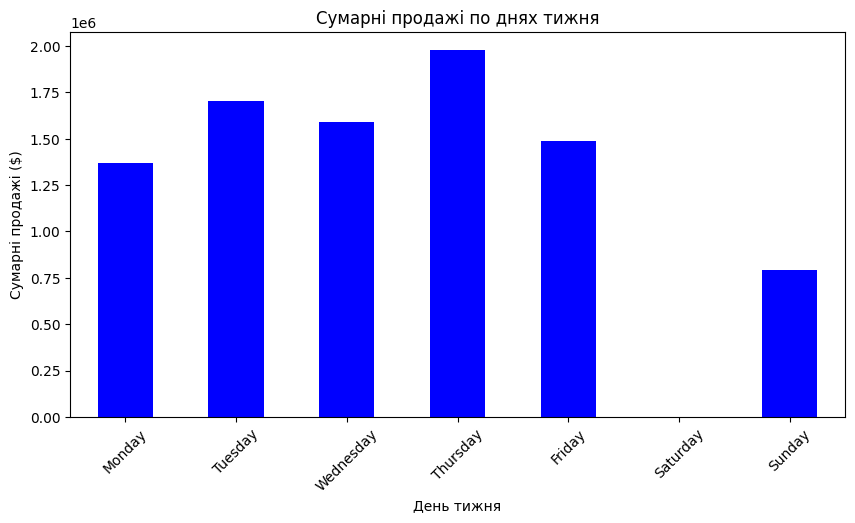

In [64]:

# Групую по днях тижня та обчислюю суму
sales_per_day = df_new_ecom.groupby('day')['amountspent'].sum().reindex(days_order)

# Малюю стовпчастий графік
plt.figure(figsize=(10,5))
sales_per_day.plot(kind='bar', color='blue')
plt.title('Сумарні продажі по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Сумарні продажі ($)')
plt.xticks(rotation=45)
plt.show()


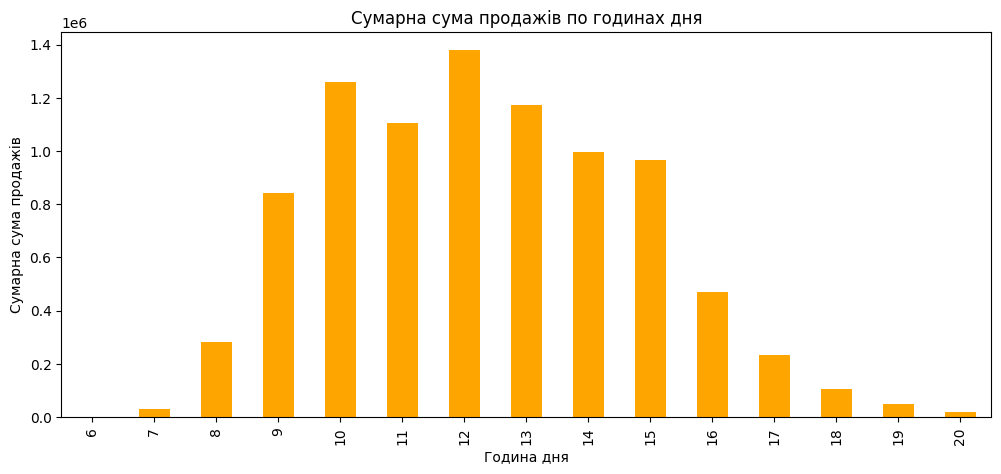

In [61]:
# Години дня
avg_amount_by_hour.plot(kind='bar', figsize=(12,5), color='orange')
plt.title('Сумарна сума продажів по годинах дня')
plt.ylabel('Сумарна сума продажів')
plt.xlabel('Година дня')
plt.show()


# Висновки:
1. Піки продажів припадають на середину періоду (приблизно періоди 10–13), а на початку і в кінці - низькі продажі.

2. Продажі по днях тижня: Найбільше у п’ятницю, відчутно менше у вихідні (особливо у суботу).

3. Продажі на суму 0 зустрічаються у різних країнах, але здебільшого у Великій Британії – це можуть бути повернення або тестові замовлення.

# Рекомендації для бізнесу:
1. Фокус на пікові періоди: варто планувати маркетингові кампанії та запаси товару на середину періоду, коли очікується максимум продажів.

2. Оптимізація роботи по дням тижня: варто робити акцент на роботу у будні дні (особливо у п’ятницю) і розглянути стимулювання продажів у вихідні.

3. Аналіз безкоштовних або повернених замовлень: варто перевірити, чому з’являються продажі з сумою 0 і чи можна це мінімізувати для зменшення операційних витрат.

4. Розподіл ресурсів: зосередити персонал та логістику у періоди з найбільшими продажами для підвищення ефективності.